In [176]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [177]:
calibrated_no2_allsites = pd.read_csv("data/no2_calibrated.csv")
reference_no2_ep = pd.read_csv("data/ep_no2_2023.csv")

In [178]:
calibrated_no2_allsites.head()

,local_timestamp,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,257_no2,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2
0,2023-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
reference_no2_ep.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
1,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
2,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
3,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
4,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300


## Begin by cleaning and understanding calibrated NO2 data from Yishu

In [180]:
#we are only going to look at EP NO2 data for now
columns = ["local_timestamp", "250_no2"]
calibrated_no2_EP = calibrated_no2_allsites[columns]
calibrated_no2_EP.head()

,local_timestamp,250_no2
0,2023-01-01 00:00:00-05:00,NaN
1,2023-01-01 01:00:00-05:00,NaN
2,2023-01-01 02:00:00-05:00,NaN
3,2023-01-01 03:00:00-05:00,NaN
4,2023-01-01 04:00:00-05:00,NaN


In [181]:
calibrated_no2_EP["local_timestamp"] = pd.to_datetime(calibrated_no2_EP["local_timestamp"], utc=True)
calibrated_no2_EP["datetime_utc"] = calibrated_no2_EP["local_timestamp"].dt.tz_convert("UTC")

cutoff = pd.Timestamp("2023-12-31 23:00:00", tz="UTC")
calibrated_no2_EP = calibrated_no2_EP[calibrated_no2_EP["datetime_utc"] <= cutoff]

calibrated_no2_EP.sort_values("datetime_utc", inplace=True)
calibrated_no2_EP.reset_index(drop=True, inplace=True)

calibrated_no2_EP.head()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/1905543782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibrated_no2_EP["local_timestamp"] = pd.to_datetime(calibrated_no2_EP["local_timestamp"], utc=True)
/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/1905543782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibrated_no2_EP["datetime_utc"] = calibrated_no2_EP["local_timestamp"].dt.tz_convert("UTC")


,local_timestamp,250_no2,datetime_utc
0,2023-01-01 05:00:00+00:00,NaN,2023-01-01 05:00:00+00:00
1,2023-01-01 06:00:00+00:00,NaN,2023-01-01 06:00:00+00:00
2,2023-01-01 07:00:00+00:00,NaN,2023-01-01 07:00:00+00:00
3,2023-01-01 08:00:00+00:00,NaN,2023-01-01 08:00:00+00:00
4,2023-01-01 09:00:00+00:00,NaN,2023-01-01 09:00:00+00:00


In [182]:
calibrated_no2_EP["250_no2"].describe()

count    7732.000000
mean        5.459427
std         5.386112
min        -9.853362
25%         2.356667
50%         3.963872
75%         6.562262
max        42.799299
Name: 250_no2, dtype: float64

In [183]:
num_null = int(calibrated_no2_EP["250_no2"].isnull().sum())
print("Number of null values: " + str(num_null))
print("Percentage of null values: " + str(num_null / len(calibrated_no2_EP["250_no2"]) * 100) + str("%"))

Number of null values: 445
Percentage of null values: 5.4420936773877955%


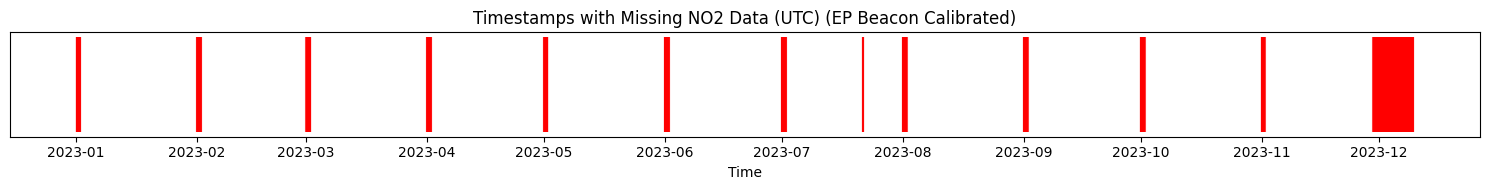

In [184]:
import matplotlib.dates as mdates

#understand missing data better
calibrated_no2_EP["missing"] = calibrated_no2_EP["250_no2"].isna()

missing_times = calibrated_no2_EP.loc[calibrated_no2_EP["missing"], "datetime_utc"]

plt.figure(figsize=(15, 2))
plt.vlines(missing_times, ymin=0, ymax=1, color="red", alpha=0.7)
plt.title("Timestamps with Missing NO2 Data (UTC) (EP Beacon Calibrated)")
plt.yticks([])
plt.xlabel("Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()



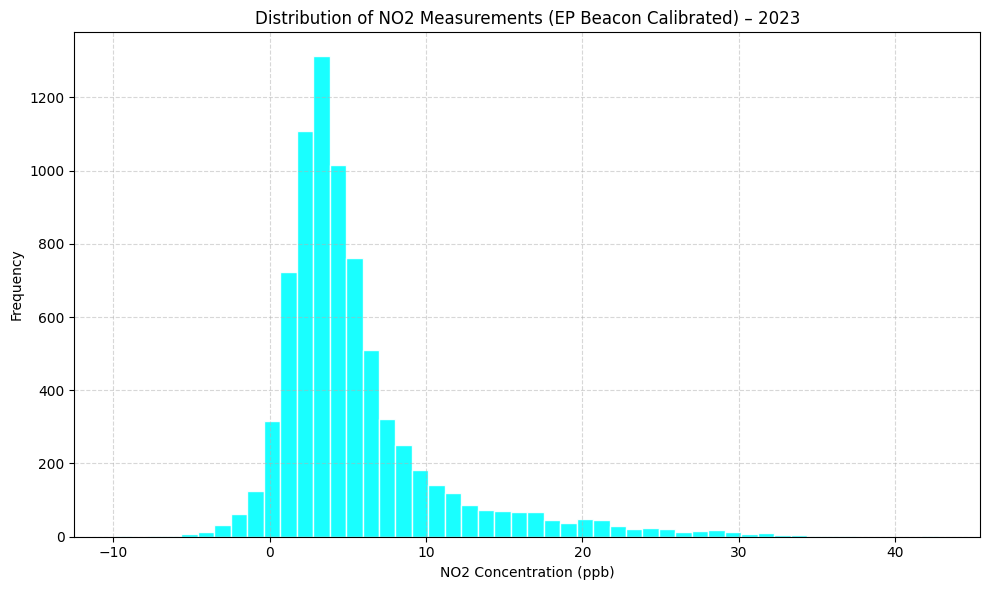

In [185]:
no2_values = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(10, 6))
plt.hist(no2_values, bins=50, color="cyan", edgecolor="white", alpha=0.9)

plt.title("Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

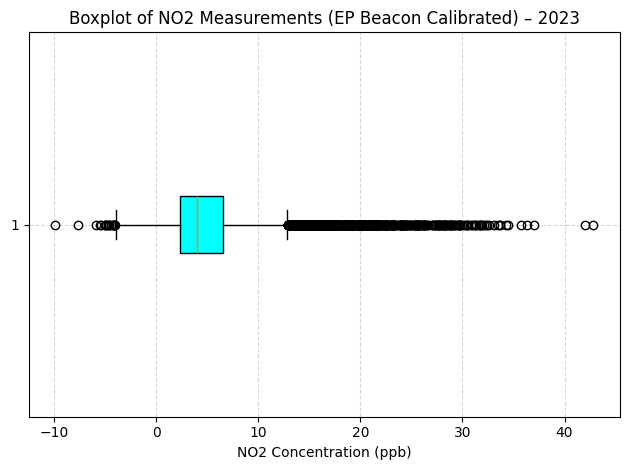

In [186]:
plt.boxplot(no2_values, vert=False, patch_artist=True,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Boxplot of NO2 Measurements (EP Beacon Calibrated) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

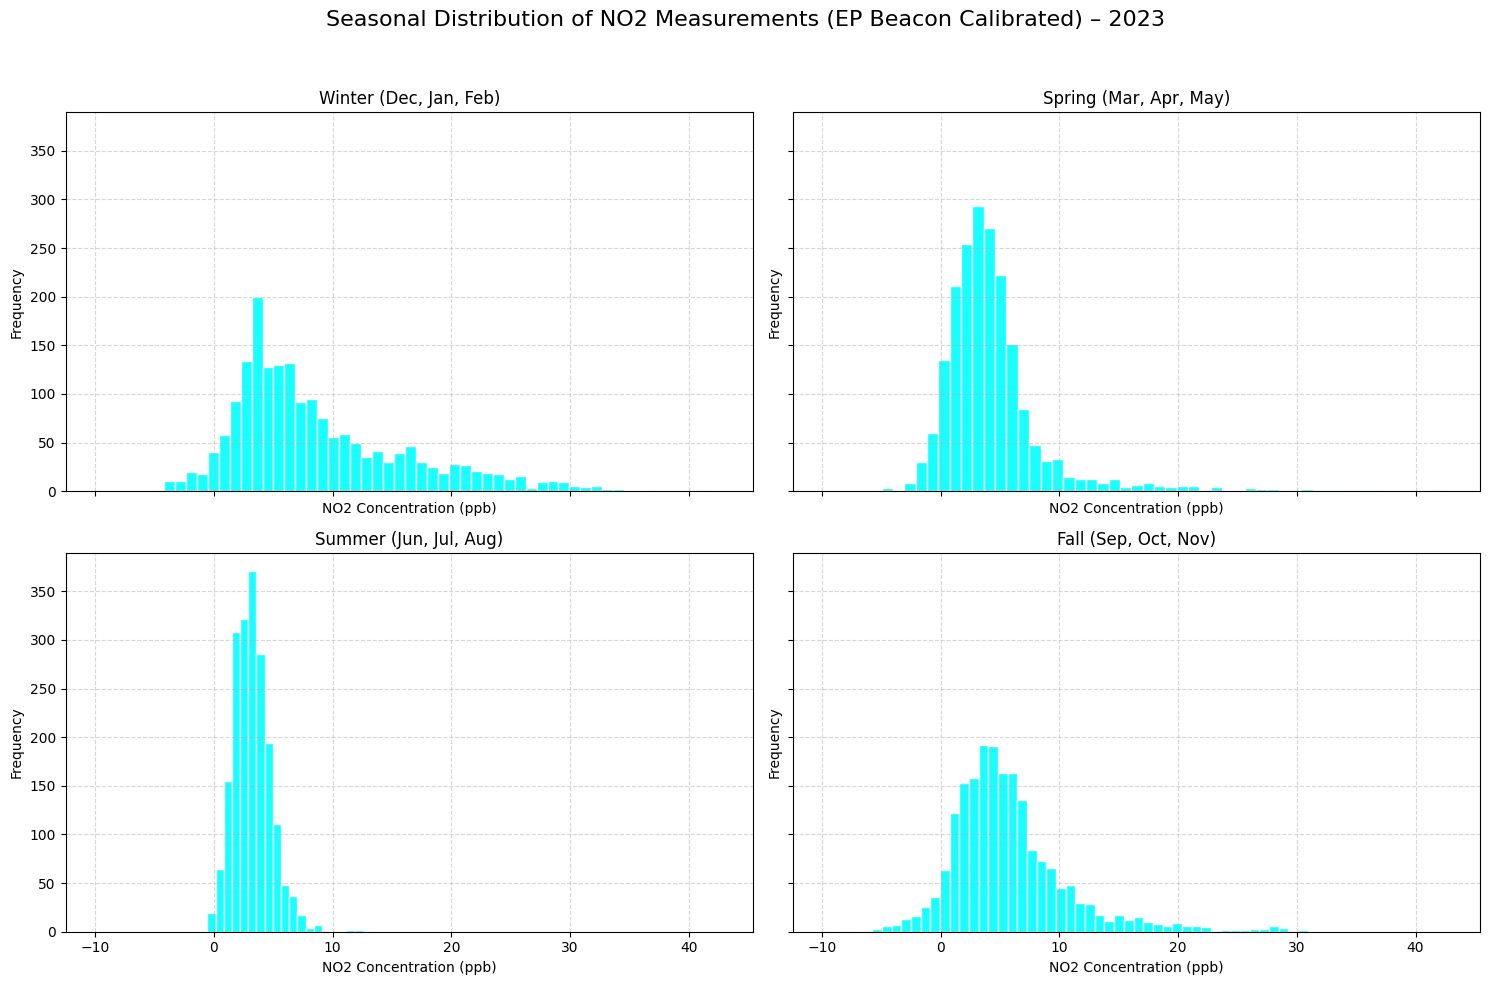

In [187]:
calibrated_no2_EP["month"] = calibrated_no2_EP["datetime_utc"].dt.month

winter = calibrated_no2_EP[calibrated_no2_EP["month"].isin([1, 2, 12])]
spring = calibrated_no2_EP[calibrated_no2_EP["month"].isin([3, 4, 5])]
summer = calibrated_no2_EP[calibrated_no2_EP["month"].isin([6, 7, 8])]
fall = calibrated_no2_EP[calibrated_no2_EP["month"].isin([9, 10, 11])]

winter_vals = winter["250_no2"].dropna()
spring_vals = spring["250_no2"].dropna()
summer_vals = summer["250_no2"].dropna()
fall_vals = fall["250_no2"].dropna()

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

seasons = {
    "Winter (Dec, Jan, Feb)": winter_vals,
    "Spring (Mar, Apr, May)": spring_vals,
    "Summer (Jun, Jul, Aug)": summer_vals,
    "Fall (Sep, Oct, Nov)": fall_vals
}

axes = axes.flatten()

for i, (season, data) in enumerate(seasons.items()):
    bins = 50
    if "Summer" in season:
        bins = 20
    
    axes[i].hist(data, bins=bins, color="cyan", edgecolor="white", alpha=0.9)
    axes[i].set_title(season)
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Seasonal Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/2731030056.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seasonal_data, vert=False, patch_artist=True,


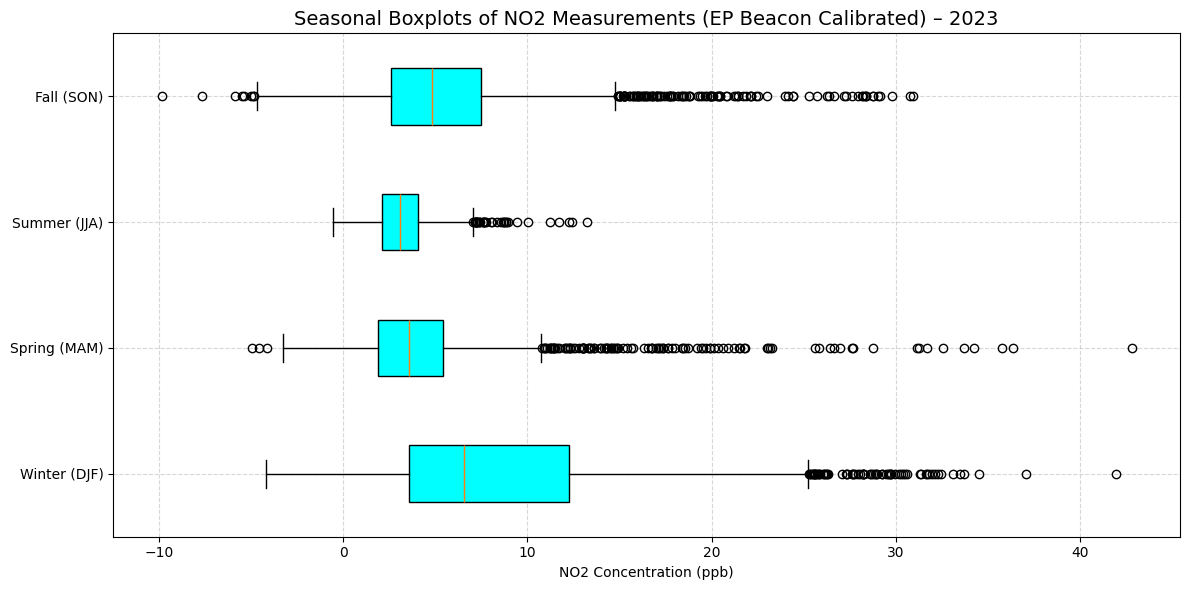

In [188]:
seasonal_data = [winter_vals, spring_vals, summer_vals, fall_vals]
season_labels = ["Winter (DJF)", "Spring (MAM)", "Summer (JJA)", "Fall (SON)"]


plt.figure(figsize=(12, 6))
plt.boxplot(seasonal_data, vert=False, patch_artist=True,
            labels=season_labels,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Seasonal Boxplots of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=14)
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


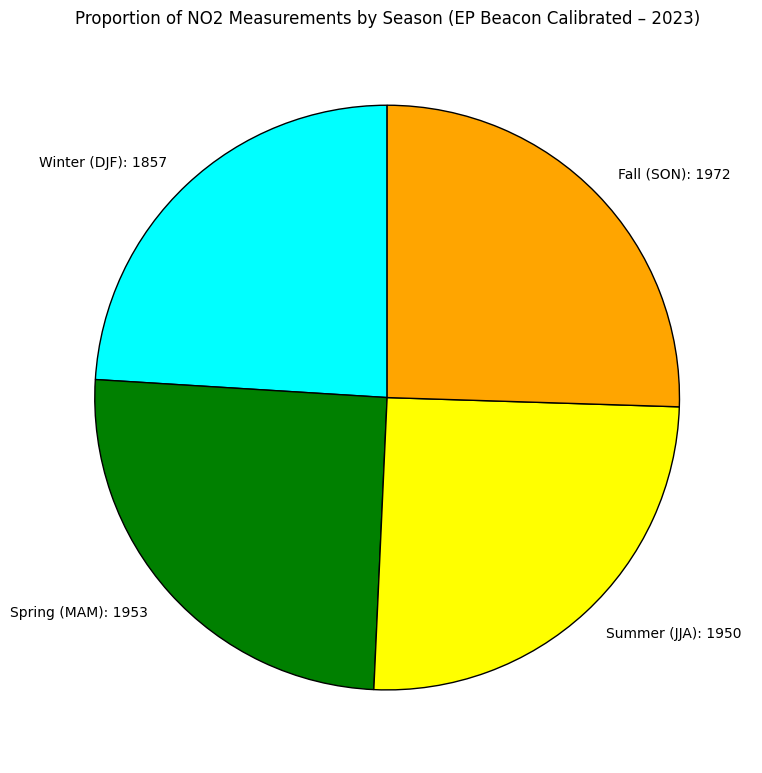

In [189]:
winter_count = len(winter["250_no2"].dropna())
spring_count = len(spring["250_no2"].dropna())
summer_count = len(summer["250_no2"].dropna())
fall_count = len(fall["250_no2"].dropna())

winter_string = "Winter (DJF): " + str(winter_count)
spring_string = "Spring (MAM): " + str(spring_count)
summer_string = "Summer (JJA): " + str(summer_count)
fall_spring = "Fall (SON): " + str(fall_count)

labels = [winter_string, spring_string, summer_string, fall_spring]
counts = [winter_count, spring_count, summer_count, fall_count]
colors = ["cyan", "green", "yellow", "orange"]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of NO2 Measurements by Season (EP Beacon Calibrated – 2023)")
plt.tight_layout()
plt.show()


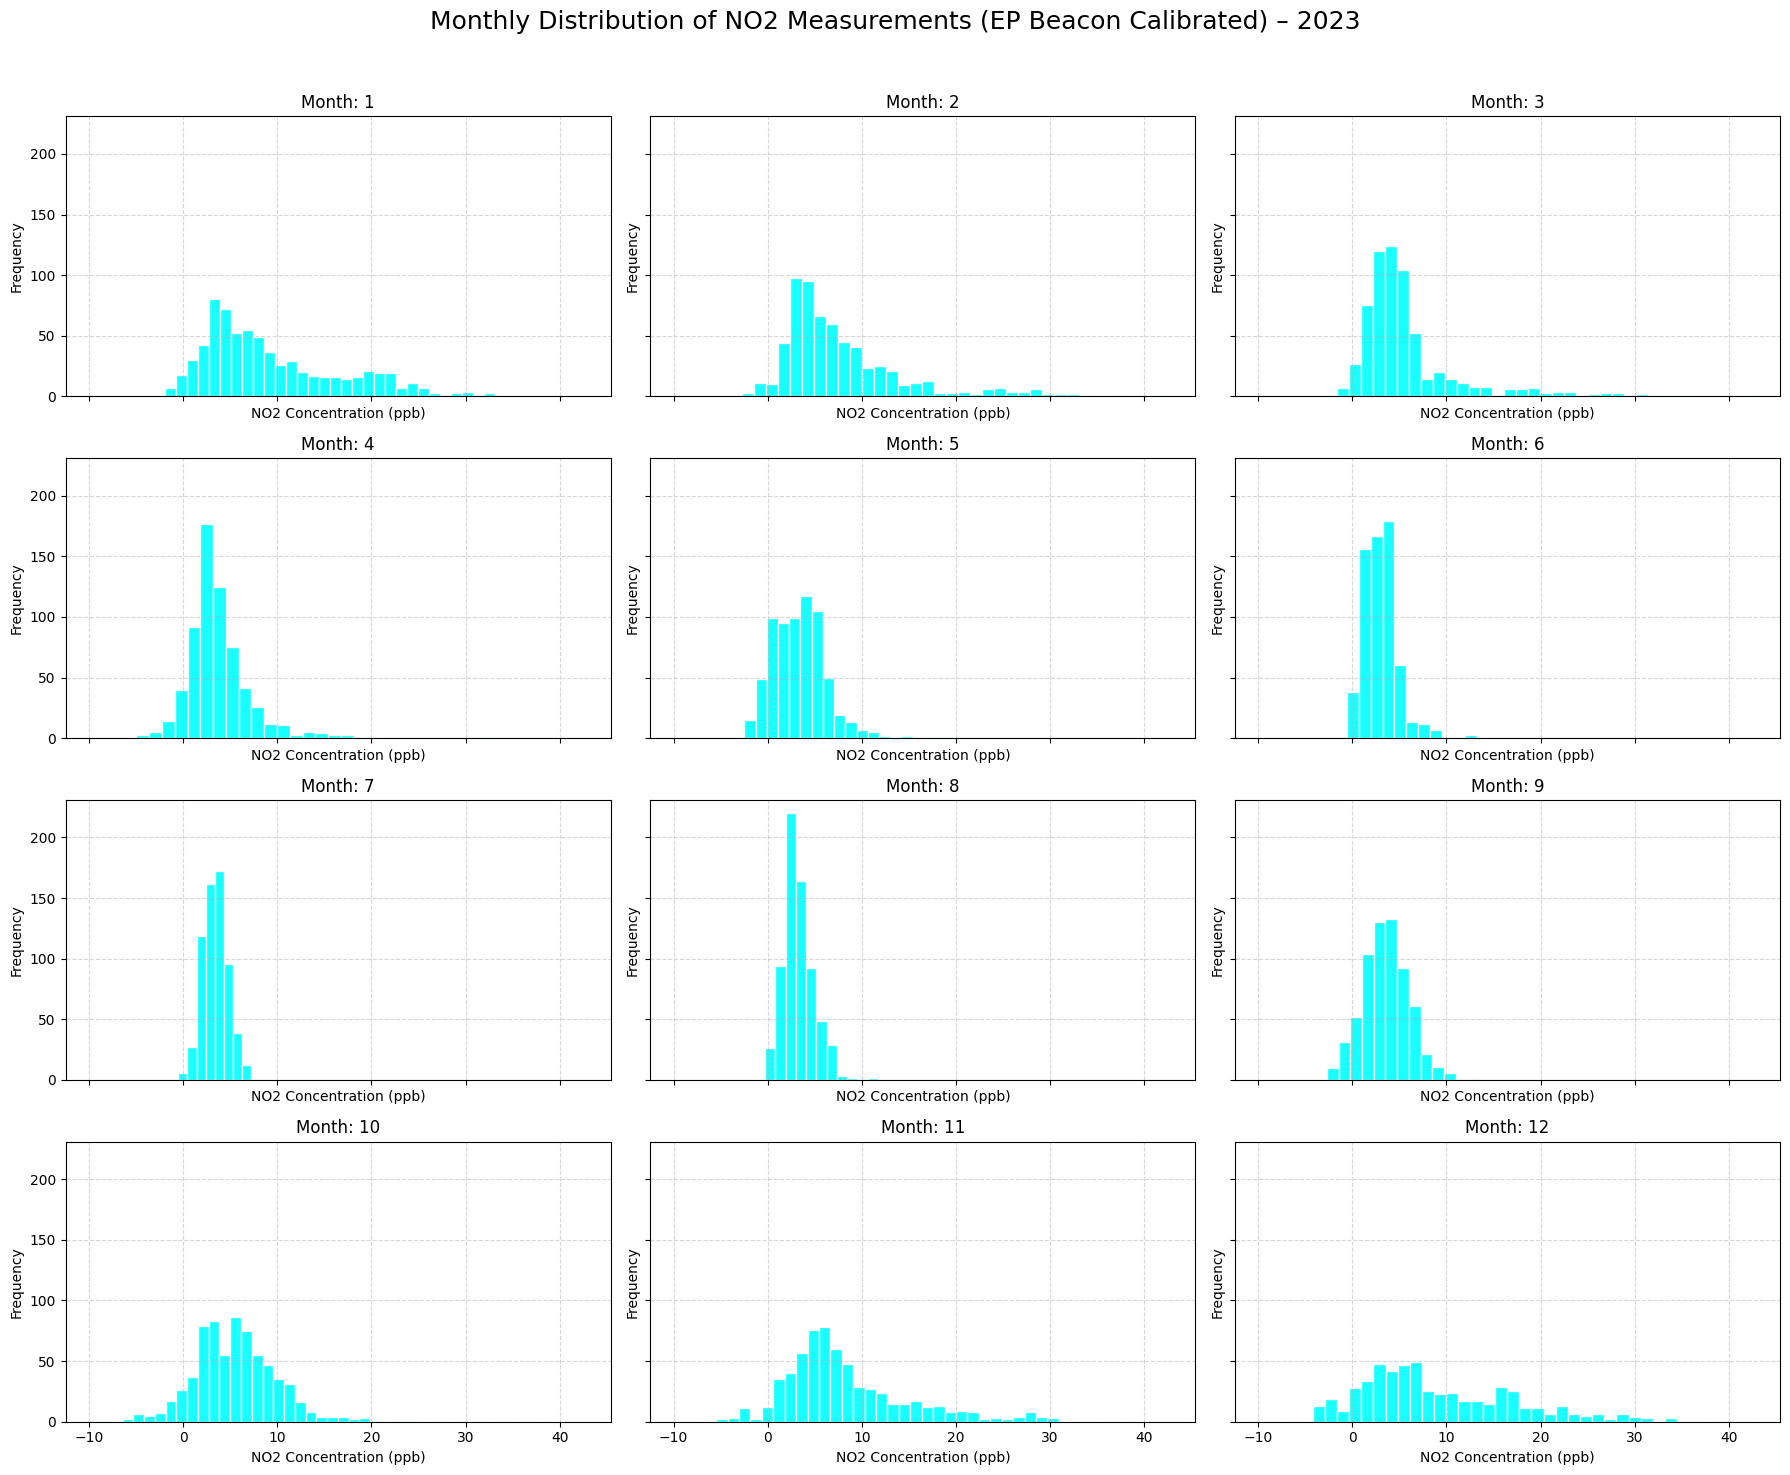

In [190]:
months = range(1, 13)
monthly_data = {month: calibrated_no2_EP[calibrated_no2_EP["month"] == month]["250_no2"].dropna() for month in months}

fig, axes = plt.subplots(4, 3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()

default_bins = 30
custom_bins = {
    2: 35,
    3: 35,
    5: 19,
    6: 11,
    7: 8,
    8: 11,
    9: 13,
}

for i, month in enumerate(months):
    data = monthly_data[month]
    bins = custom_bins.get(month, default_bins)
    axes[i].hist(data, bins=bins, color="cyan", edgecolor="white", alpha=0.9)
    axes[i].set_title(f"Month: {month}")
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Monthly Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/411143776.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,


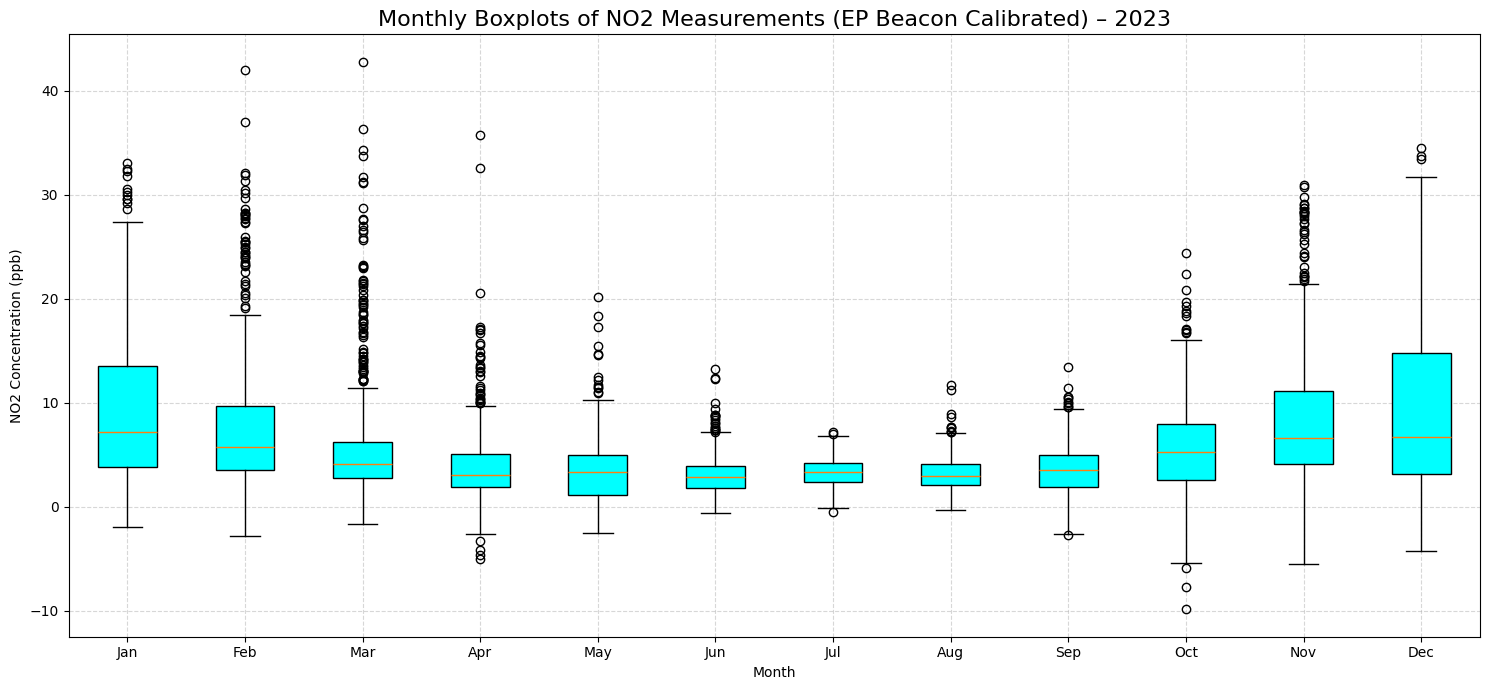

In [191]:
monthly_values = [monthly_data[m] for m in months]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(15, 7))
plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Monthly Boxplots of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=16)
plt.xlabel("Month")
plt.ylabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

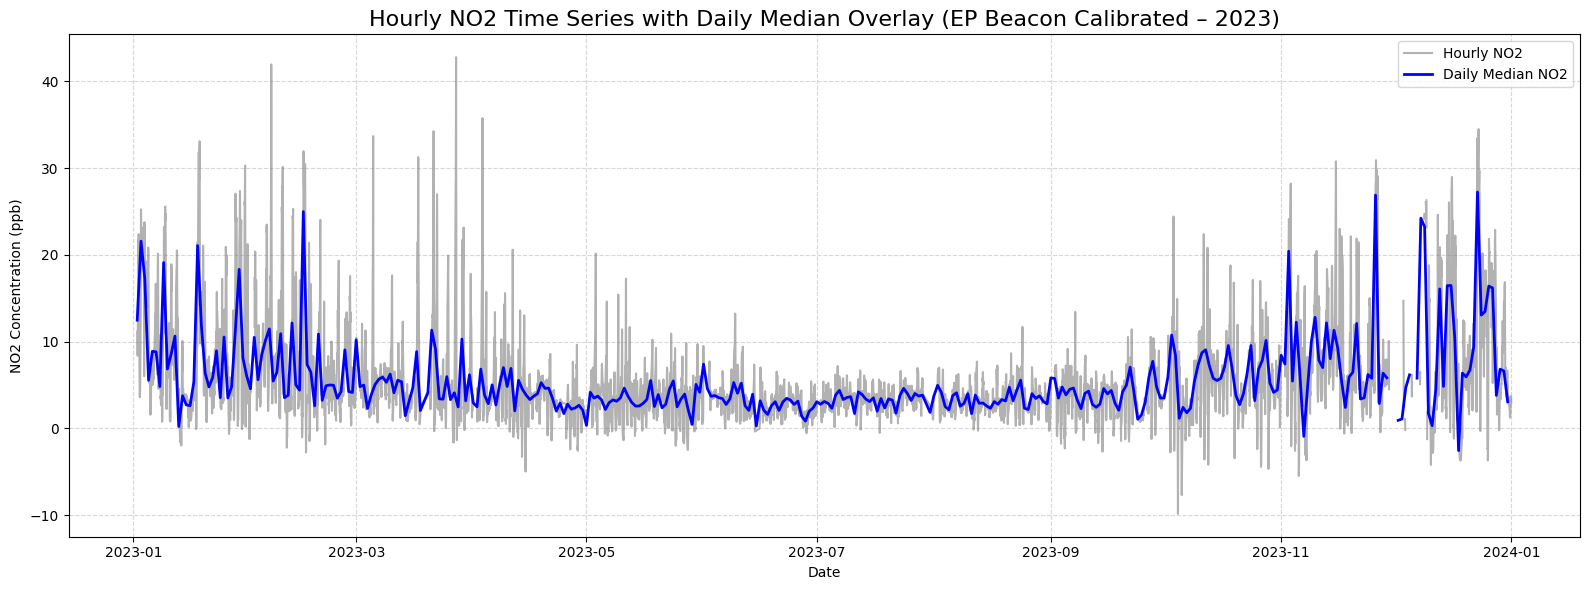

In [192]:
calibrated_no2_EP["datetime_utc"] = pd.to_datetime(calibrated_no2_EP["datetime_utc"])

calibrated_no2_EP["date"] = calibrated_no2_EP["datetime_utc"].dt.date

daily_median = calibrated_no2_EP.groupby("date")["250_no2"].median()

plt.figure(figsize=(16, 6))
plt.plot(calibrated_no2_EP["datetime_utc"], calibrated_no2_EP["250_no2"],
         color="gray", alpha=0.6, label="Hourly NO2")

plt.plot(daily_median.index, daily_median.values,
         color="blue", linewidth=2, label="Daily Median NO2")

plt.title("Hourly NO2 Time Series with Daily Median Overlay (EP Beacon Calibrated – 2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



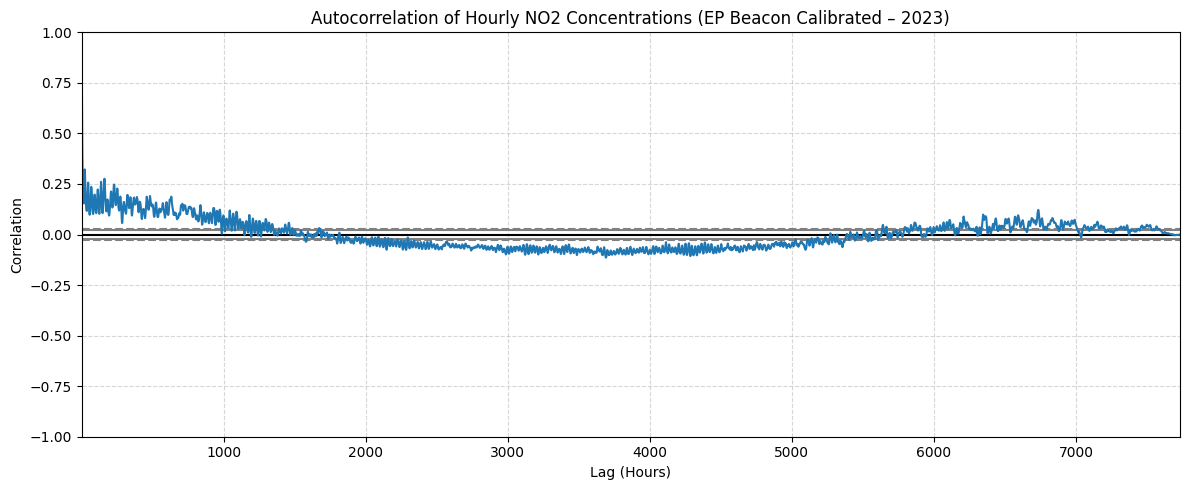

In [193]:
from pandas.plotting import autocorrelation_plot

no2_series = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(12, 5))
autocorrelation_plot(no2_series)
plt.title("Autocorrelation of Hourly NO2 Concentrations (EP Beacon Calibrated – 2023)")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

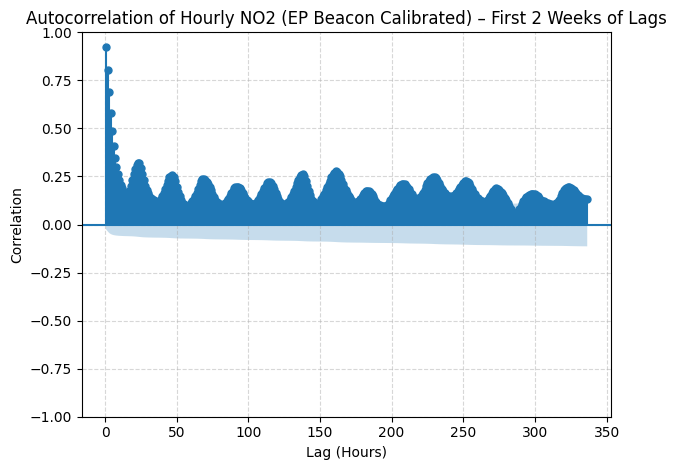

In [194]:
from statsmodels.graphics.tsaplots import plot_acf

no2_series = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(12, 5))
plot_acf(no2_series, lags=336, zero=False)
plt.title("Autocorrelation of Hourly NO2 (EP Beacon Calibrated) – First 2 Weeks of Lags")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


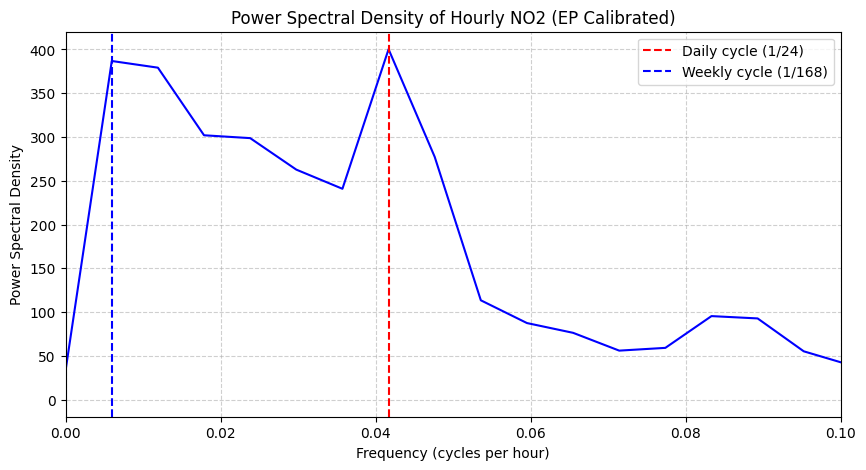

In [227]:
from scipy.signal import welch

no2_series = calibrated_no2_EP["250_no2"].dropna()

#one sample per hour
fs = 1  

frequencies, power = welch(no2_series, fs=fs, nperseg=168)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, color="blue")
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density of Hourly NO2 (EP Calibrated)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="red", linestyle="--", label="Daily cycle (1/24)")
plt.axvline(1/168, color="blue", linestyle="--", label="Weekly cycle (1/168)")
plt.legend()

plt.show()


## Moving on to processing the EP DEM site

In [195]:
reference_no2_ep.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

In [196]:
columns_to_remove = ["state_code", "county_code", "site_number", "parameter_code", "poc", "datum", "date_local", "time_local", "units_of_measure_code", 'sample_duration_code', 'sample_frequency', 'uncertainty', 'qualifier', 'method_type', 'method', 'method_code', 'date_of_last_change', 'cbsa_code']
reference_no2_ep = reference_no2_ep.drop(columns=columns_to_remove)
reference_no2_ep.head()

,latitude,longitude,parameter,date_gmt,time_gmt,sample_measurement,units_of_measure,sample_duration,detection_limit,state,county
0,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,13:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
1,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,14:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
2,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,15:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
3,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,16:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
4,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,17:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence


In [197]:
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["date_gmt"] + " " + reference_no2_ep["time_gmt"], utc=True)

reference_no2_ep.rename(columns={"sample_measurement": "true_no2"}, inplace=True)

reference_no2_ep.sort_values("datetime_utc", inplace=True)
reference_no2_ep.reset_index(drop=True, inplace=True)


In [198]:
reference_no2_ep["true_no2"].describe()

count    16368.000000
mean         5.558572
std          5.906841
min          0.100000
25%          1.800000
50%          3.300000
75%          6.800000
max         38.800000
Name: true_no2, dtype: float64

In [199]:
num_null = int(reference_no2_ep["true_no2"].isnull().sum())
print("Number of null values: " + str(num_null))
print("Percentage of null values: " + str(num_null / len(reference_no2_ep["true_no2"]) * 100) + str("%"))

Number of null values: 1152
Percentage of null values: 6.575342465753424%


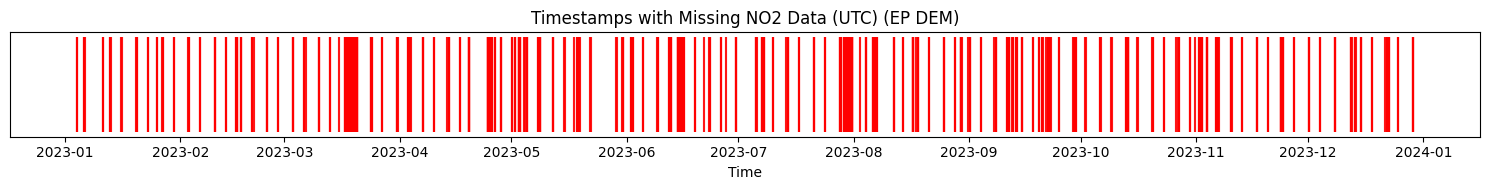

In [200]:
#understand missing data better
reference_no2_ep["missing"] = reference_no2_ep["true_no2"].isna()

missing_times = reference_no2_ep.loc[reference_no2_ep["missing"], "datetime_utc"]

plt.figure(figsize=(15, 2))
plt.vlines(missing_times, ymin=0, ymax=1, color="red", alpha=0.7)
plt.title("Timestamps with Missing NO2 Data (UTC) (EP DEM)")
plt.yticks([])
plt.xlabel("Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

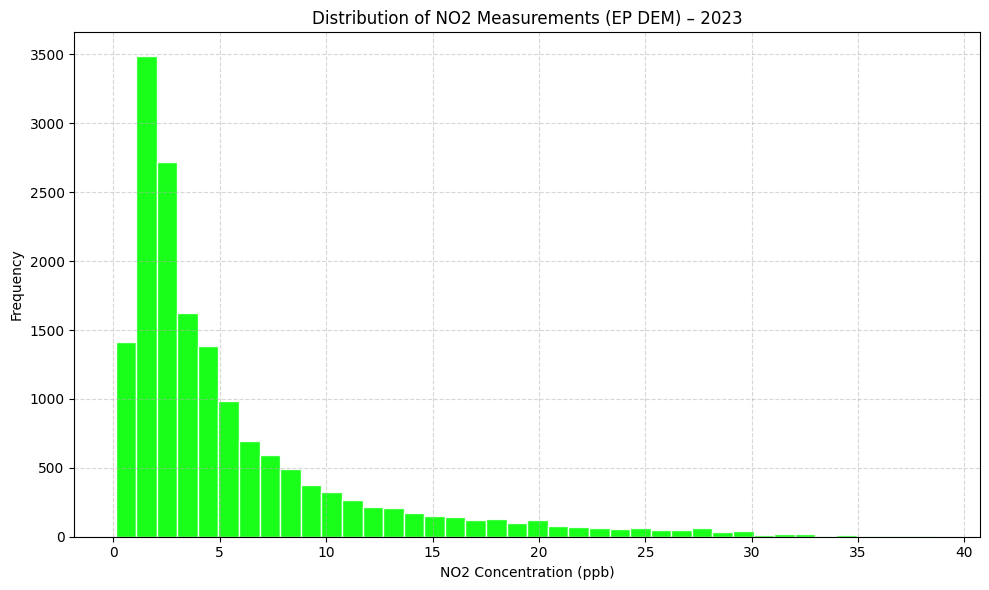

In [201]:
no2_values = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(10, 6))
plt.hist(no2_values, bins=40, color="lime", edgecolor="white", alpha=0.9)

plt.title("Distribution of NO2 Measurements (EP DEM) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

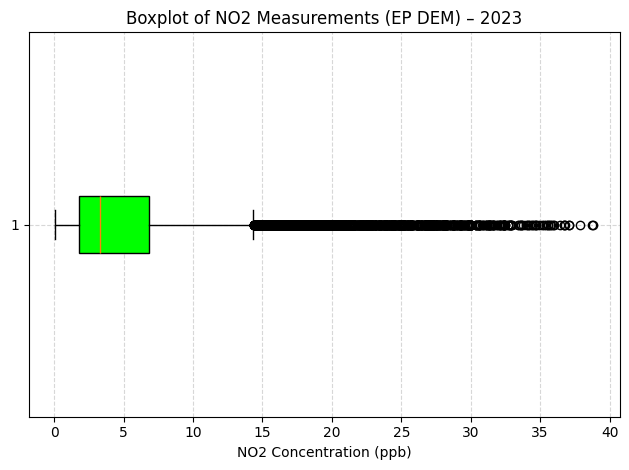

In [202]:
plt.boxplot(no2_values, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Boxplot of NO2 Measurements (EP DEM) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

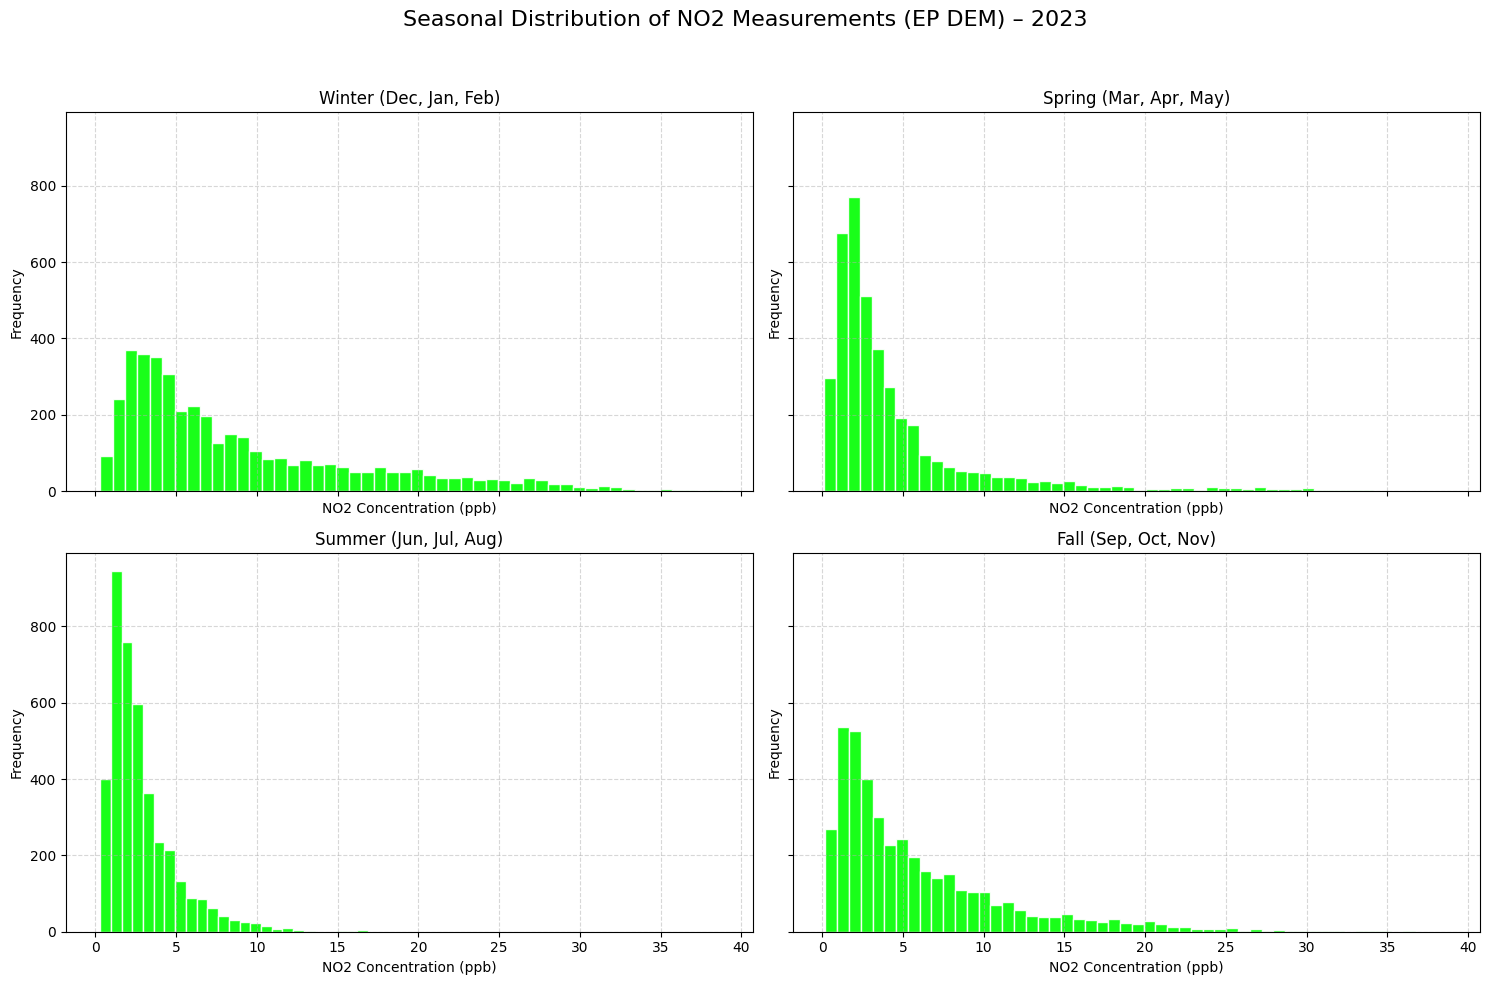

In [203]:
reference_no2_ep["month"] = reference_no2_ep["datetime_utc"].dt.month

winter = reference_no2_ep[reference_no2_ep["month"].isin([1, 2, 12])]
spring = reference_no2_ep[reference_no2_ep["month"].isin([3, 4, 5])]
summer = reference_no2_ep[reference_no2_ep["month"].isin([6, 7, 8])]
fall = reference_no2_ep[reference_no2_ep["month"].isin([9, 10, 11])]

winter_vals = winter["true_no2"].dropna()
spring_vals = spring["true_no2"].dropna()
summer_vals = summer["true_no2"].dropna()
fall_vals = fall["true_no2"].dropna()

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

seasons = {
    "Winter (Dec, Jan, Feb)": winter_vals,
    "Spring (Mar, Apr, May)": spring_vals,
    "Summer (Jun, Jul, Aug)": summer_vals,
    "Fall (Sep, Oct, Nov)": fall_vals
}

axes = axes.flatten()

for i, (season, data) in enumerate(seasons.items()):
    bins = 50
    if "Summer" in season:
        bins = 25
    
    axes[i].hist(data, bins=bins, color="lime", edgecolor="white", alpha=0.9)
    axes[i].set_title(season)
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Seasonal Distribution of NO2 Measurements (EP DEM) – 2023", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/1952694920.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seasonal_data, vert=False, patch_artist=True,


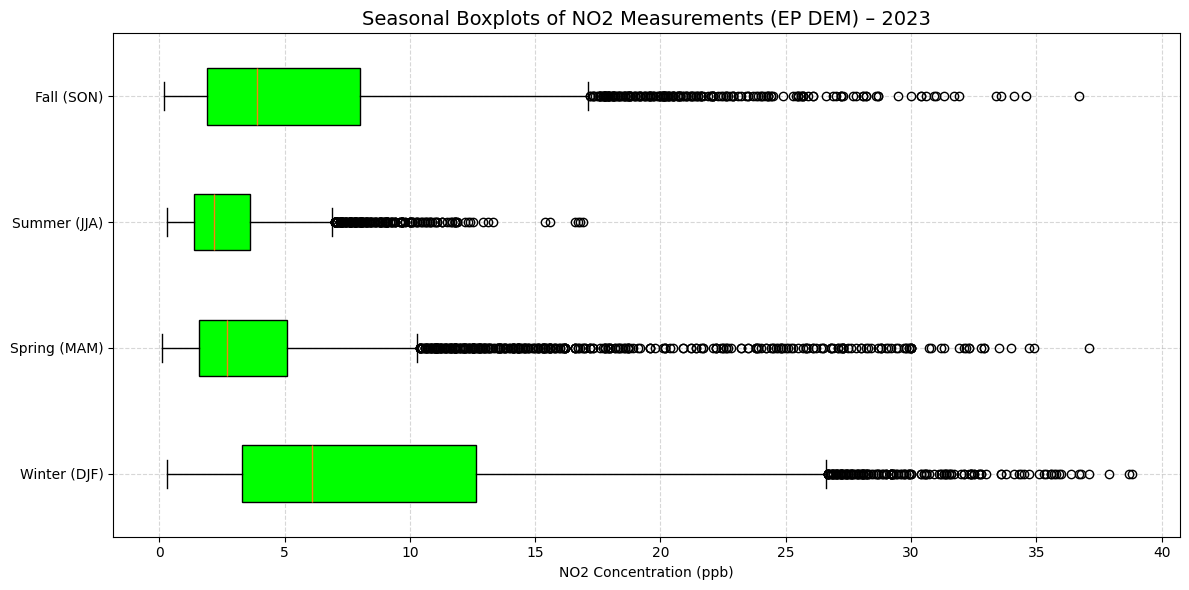

In [204]:
seasonal_data = [winter_vals, spring_vals, summer_vals, fall_vals]
season_labels = ["Winter (DJF)", "Spring (MAM)", "Summer (JJA)", "Fall (SON)"]


plt.figure(figsize=(12, 6))
plt.boxplot(seasonal_data, vert=False, patch_artist=True,
            labels=season_labels,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Seasonal Boxplots of NO2 Measurements (EP DEM) – 2023", fontsize=14)
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


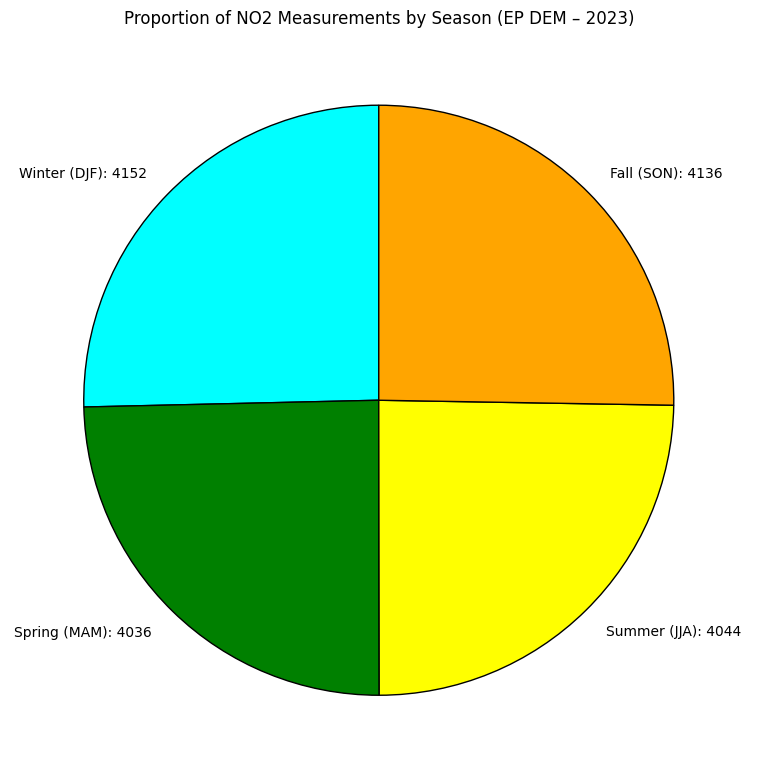

In [205]:
winter_count = len(winter["true_no2"].dropna())
spring_count = len(spring["true_no2"].dropna())
summer_count = len(summer["true_no2"].dropna())
fall_count = len(fall["true_no2"].dropna())

winter_string = "Winter (DJF): " + str(winter_count)
spring_string = "Spring (MAM): " + str(spring_count)
summer_string = "Summer (JJA): " + str(summer_count)
fall_spring = "Fall (SON): " + str(fall_count)

labels = [winter_string, spring_string, summer_string, fall_spring]
counts = [winter_count, spring_count, summer_count, fall_count]
colors = ["cyan", "green", "yellow", "orange"]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of NO2 Measurements by Season (EP DEM – 2023)")
plt.tight_layout()
plt.show()

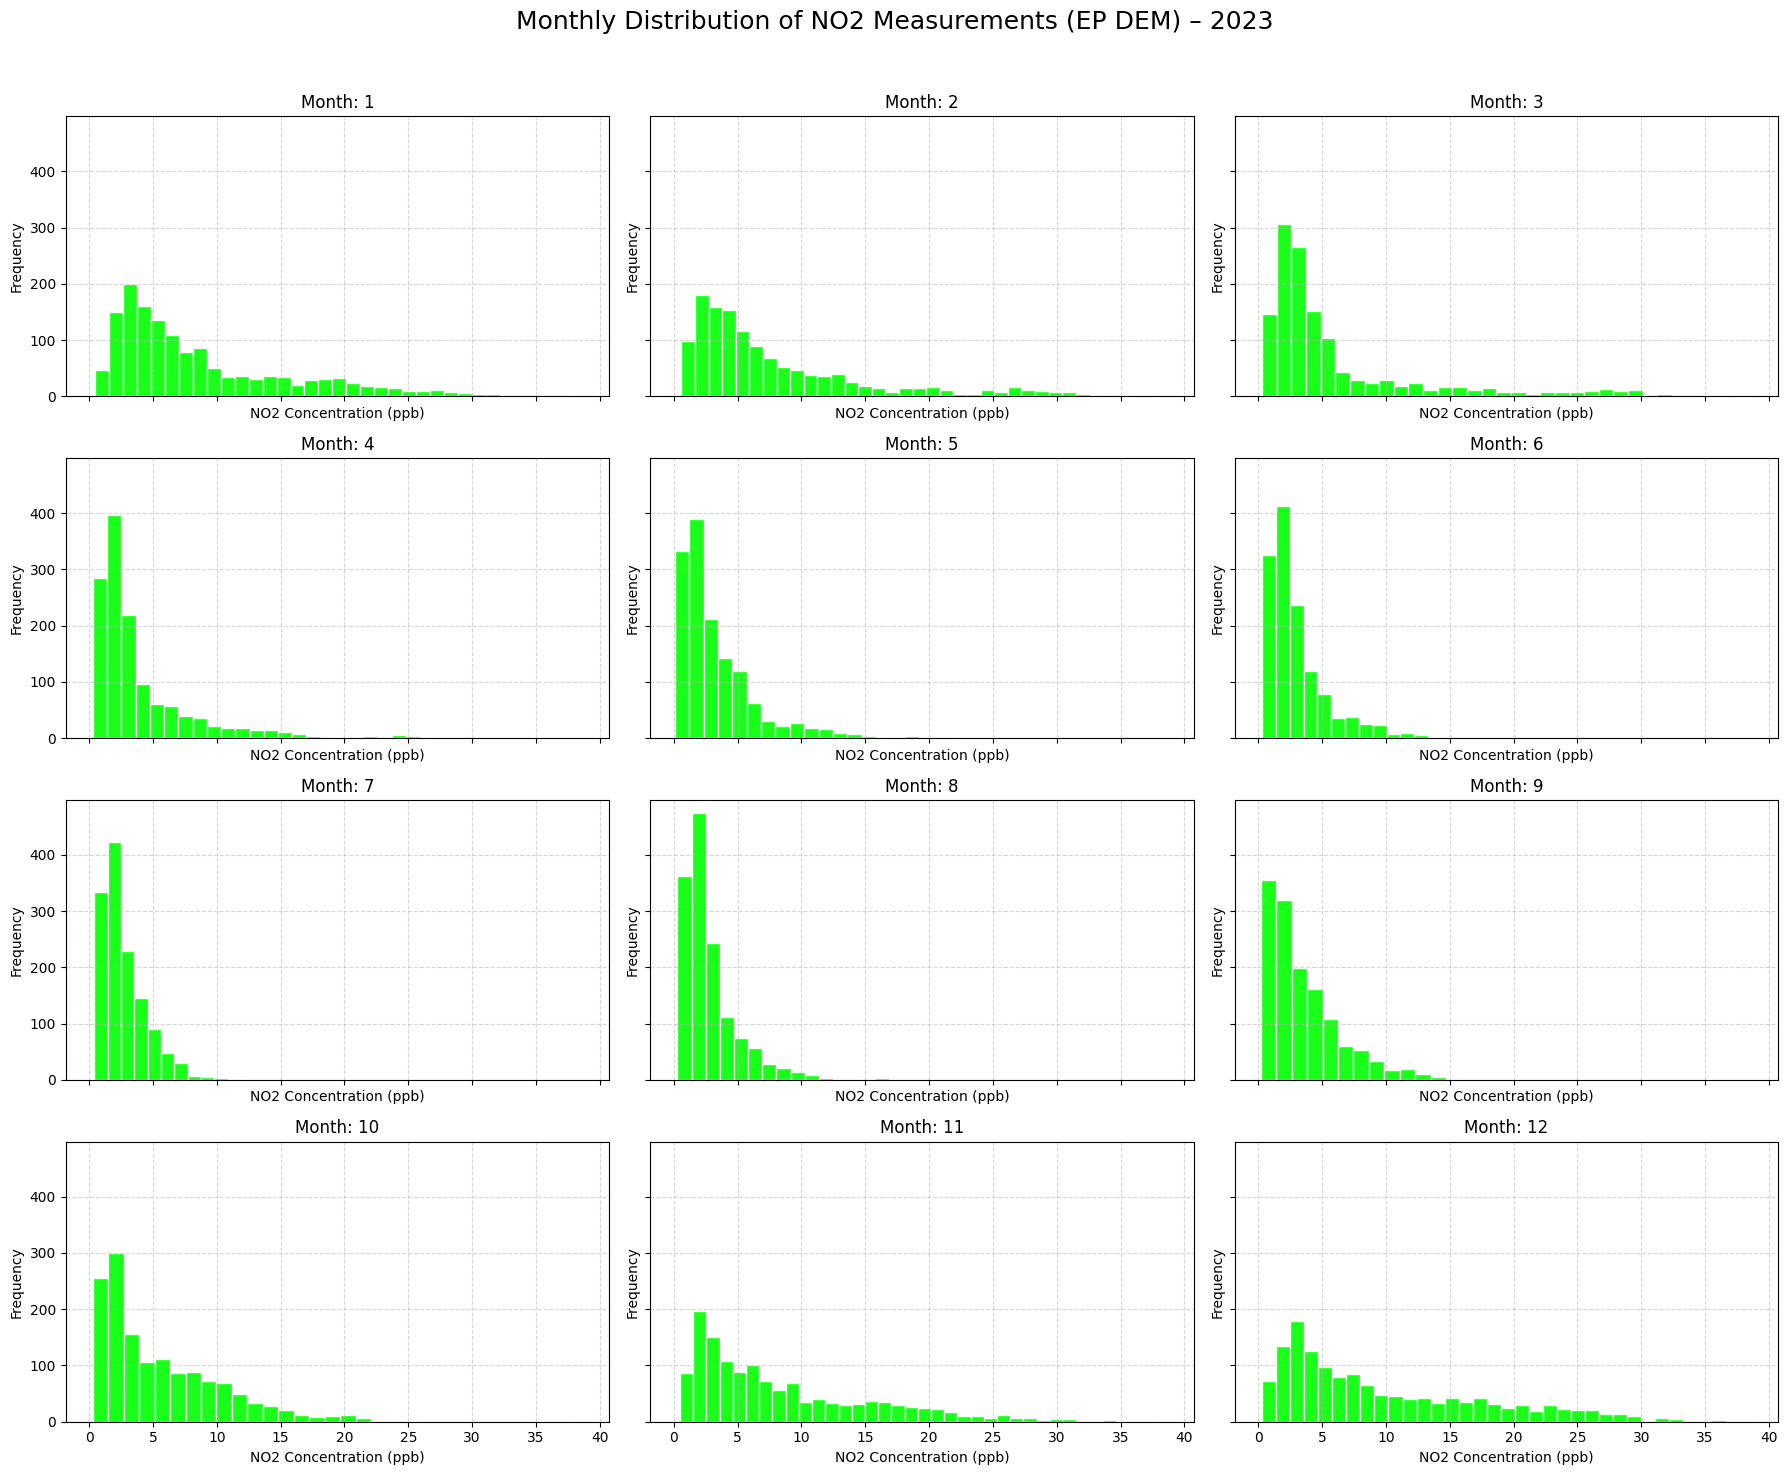

In [206]:
months = range(1, 13)
monthly_data = {month: reference_no2_ep[reference_no2_ep["month"] == month]["true_no2"].dropna() for month in months}

fig, axes = plt.subplots(4, 3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()

default_bins = 35
custom_bins = {
    3: 30,
    4: 33,
    5: 20,
    6: 12,
    7: 11,
    8: 15,
    9: 12,
    10: 20
}

for i, month in enumerate(months):
    data = monthly_data[month]
    bins = custom_bins.get(month, default_bins)
    axes[i].hist(data, bins=bins, color="lime", edgecolor="white", alpha=0.9)
    axes[i].set_title(f"Month: {month}")
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Monthly Distribution of NO2 Measurements (EP DEM) – 2023", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_61089/883805939.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,


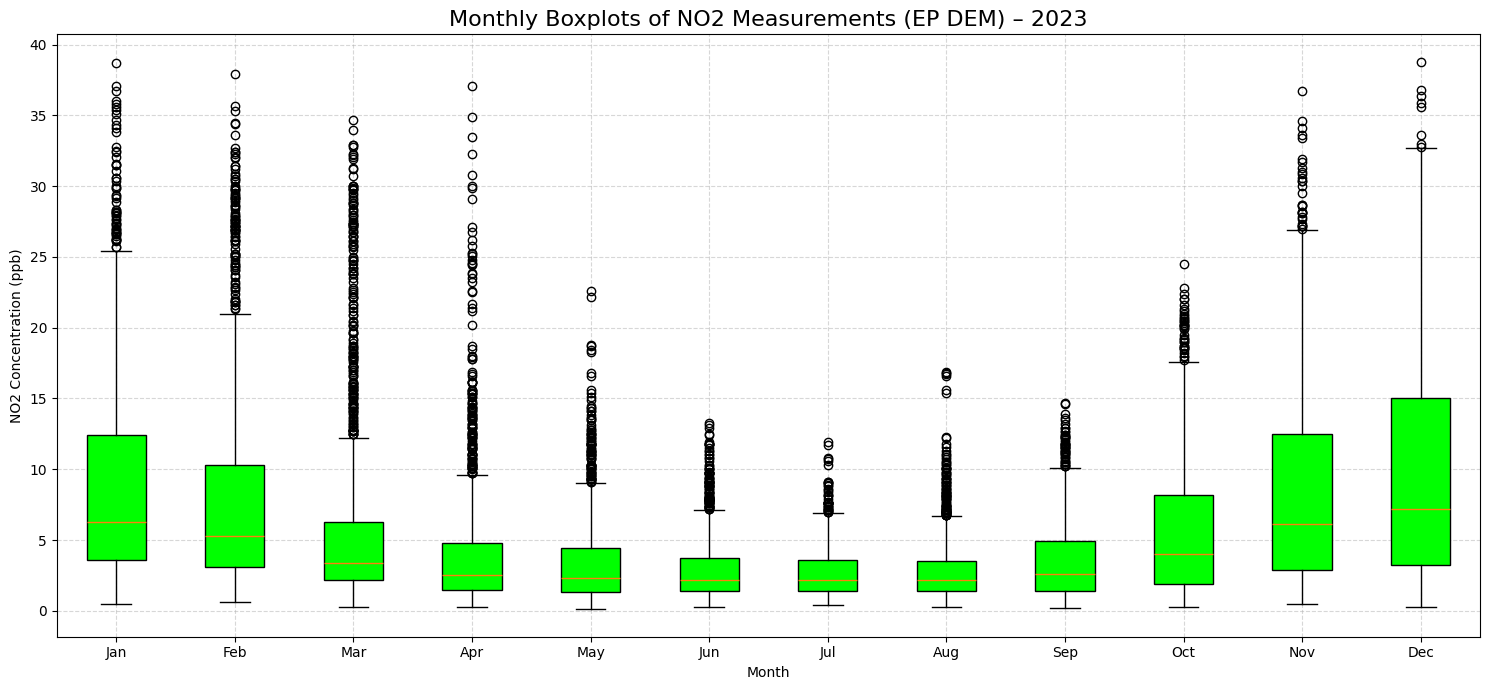

In [207]:
monthly_values = [monthly_data[m] for m in months]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(15, 7))
plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Monthly Boxplots of NO2 Measurements (EP DEM) – 2023", fontsize=16)
plt.xlabel("Month")
plt.ylabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

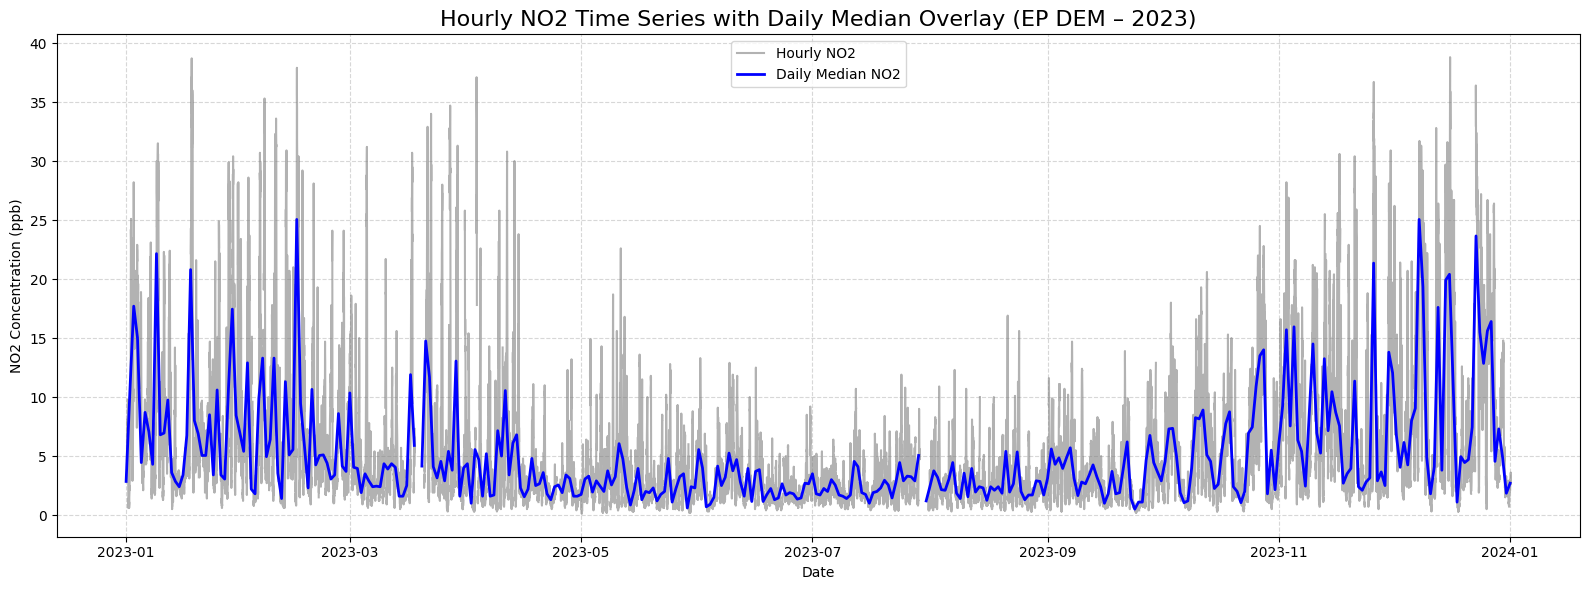

In [208]:
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["datetime_utc"])

reference_no2_ep["date"] = reference_no2_ep["datetime_utc"].dt.date

daily_median = reference_no2_ep.groupby("date")["true_no2"].median()

plt.figure(figsize=(16, 6))
plt.plot(reference_no2_ep["datetime_utc"], reference_no2_ep["true_no2"],
         color="gray", alpha=0.6, label="Hourly NO2")

plt.plot(daily_median.index, daily_median.values,
         color="blue", linewidth=2, label="Daily Median NO2")

plt.title("Hourly NO2 Time Series with Daily Median Overlay (EP DEM – 2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


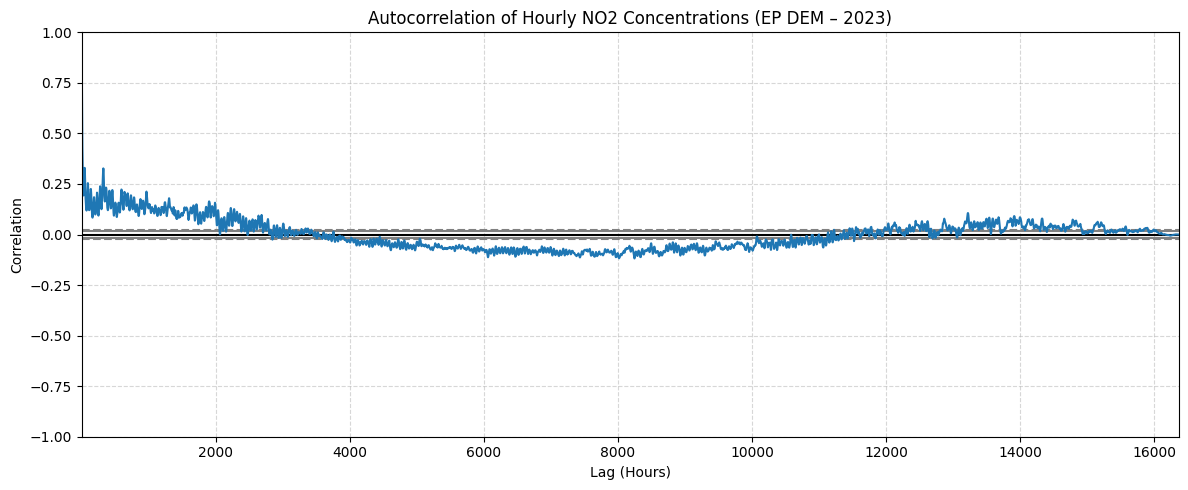

In [209]:
no2_series = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(12, 5))
autocorrelation_plot(no2_series)
plt.title("Autocorrelation of Hourly NO2 Concentrations (EP DEM – 2023)")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

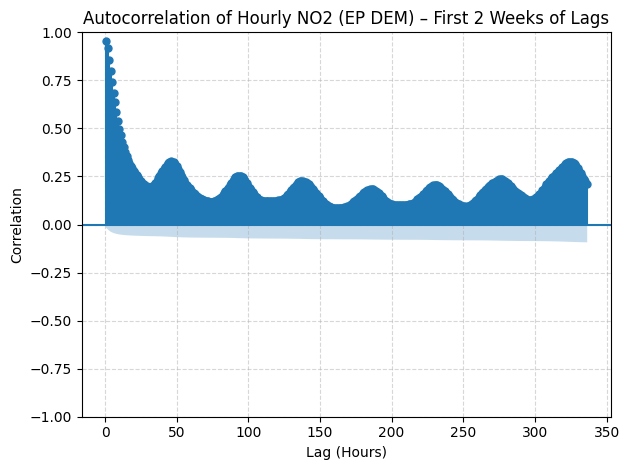

In [230]:
no2_series = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(12, 5))
plot_acf(no2_series, lags=336, zero=False)
plt.title("Autocorrelation of Hourly NO2 (EP DEM) – First 2 Weeks of Lags")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

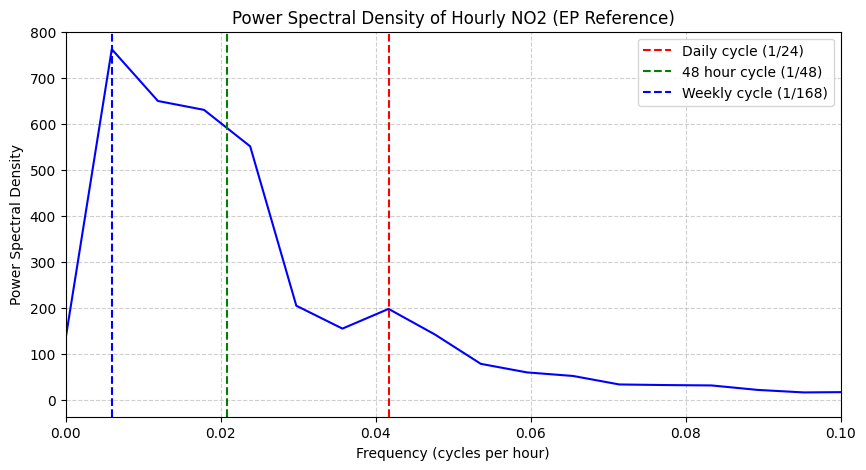

In [233]:
no2_series = reference_no2_ep["true_no2"].dropna()

#one sample per hour
fs = 1  

frequencies, power = welch(no2_series, fs=fs, nperseg=168)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, color="blue")
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density of Hourly NO2 (EP Reference)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="red", linestyle="--", label="Daily cycle (1/24)")
plt.axvline(1/48, color="green", linestyle="--", label="48 hour cycle (1/48)")
plt.axvline(1/168, color="blue", linestyle="--", label="Weekly cycle (1/168)")
plt.legend()

plt.show()


## Bring the graphs together

In [ ]:
combined_df = pd.merge(
    calibrated_no2_EP[["datetime_utc", "250_no2"]],
    reference_no2_ep[["datetime_utc", "true_no2"]],
    on="datetime_utc",
    how="inner"
)
combined_df.sort_values("datetime_utc", inplace=True)

combined_df.head()

,datetime_utc,250_no2,true_no2
0,2023-01-01 05:00:00+00:00,NaN,4.1
1,2023-01-01 05:00:00+00:00,NaN,4.6
2,2023-01-01 06:00:00+00:00,NaN,5.9
3,2023-01-01 06:00:00+00:00,NaN,6.6
4,2023-01-01 07:00:00+00:00,NaN,7.4


<Figure size 1600x600 with 0 Axes>

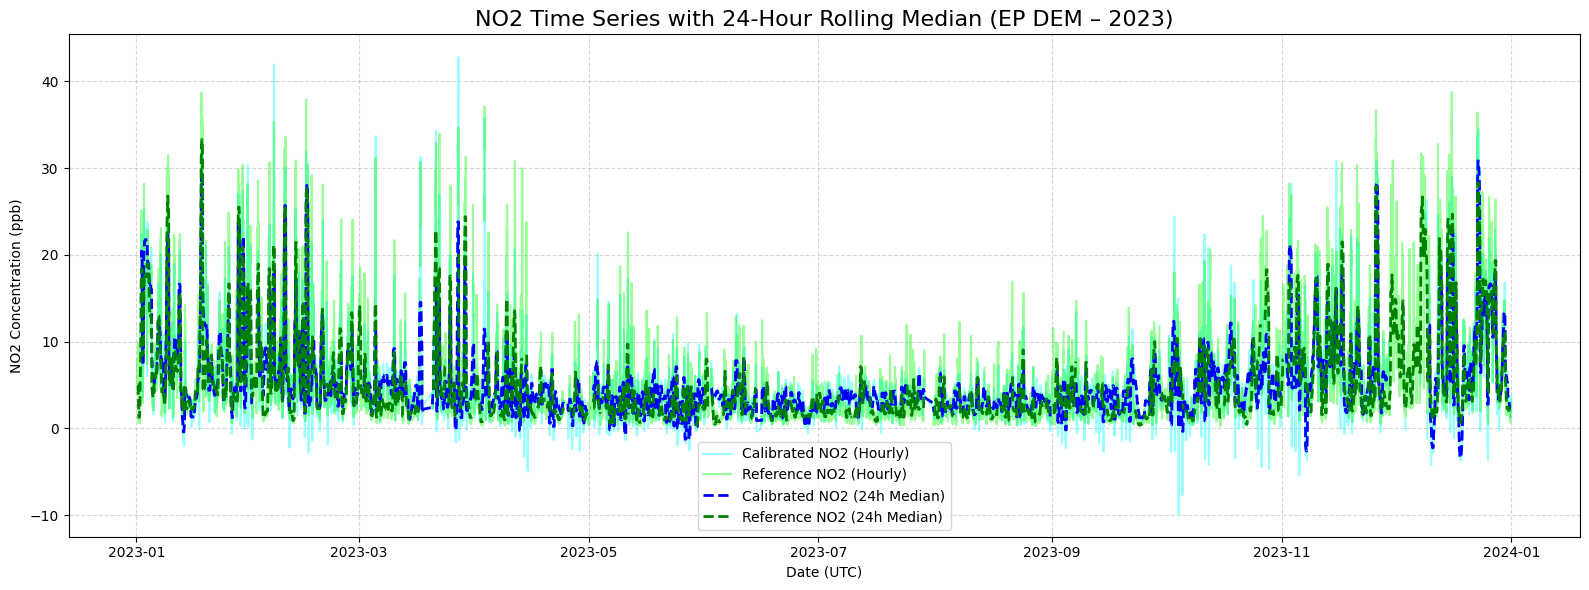

In [ ]:
plt.figure(figsize=(16, 6))

combined_df["250_no2_median_24h"] = combined_df["250_no2"].rolling(window=24, center=True).median()
combined_df["true_no2_median_24h"] = combined_df["true_no2"].rolling(window=24, center=True).median()

plt.figure(figsize=(16, 6))

plt.plot(combined_df["datetime_utc"], combined_df["250_no2"], color="cyan", alpha=0.4, label="Calibrated NO2 (Hourly)")
plt.plot(combined_df["datetime_utc"], combined_df["true_no2"], color="lime", alpha=0.4, label="Reference NO2 (Hourly)")


plt.plot(combined_df["datetime_utc"], combined_df["250_no2_median_24h"],
         color="blue", linestyle="--", linewidth=2, label="Calibrated NO2 (24h Median)")
plt.plot(combined_df["datetime_utc"], combined_df["true_no2_median_24h"],
         color="green", linestyle="--", linewidth=2, label="Reference NO2 (24h Median)")

plt.title("NO2 Time Series with 24-Hour Rolling Median (EP DEM – 2023)", fontsize=16)
plt.xlabel("Date (UTC)")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
def plot_single_day(df, date_str):
    from datetime import datetime, timedelta

    date = pd.to_datetime(date_str, utc=True)
    next_day = date + timedelta(days=1)

    df_day = df[(df["datetime_utc"] >= date) & (df["datetime_utc"] < next_day)].copy()

    plt.figure(figsize=(12, 5))

    plt.plot(df_day["datetime_utc"], df_day["250_no2"], color="cyan", alpha=0.4, label="Calibrated NO₂")
    plt.plot(df_day["datetime_utc"], df_day["true_no2"], color="lime", alpha=0.4, label="Reference NO₂")


    plt.title(f"NO2 Time Series – {date_str} (UTC)", fontsize=14)
    plt.xlabel("Hour (UTC)")
    plt.ylabel("NO2 Concentration (ppb)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


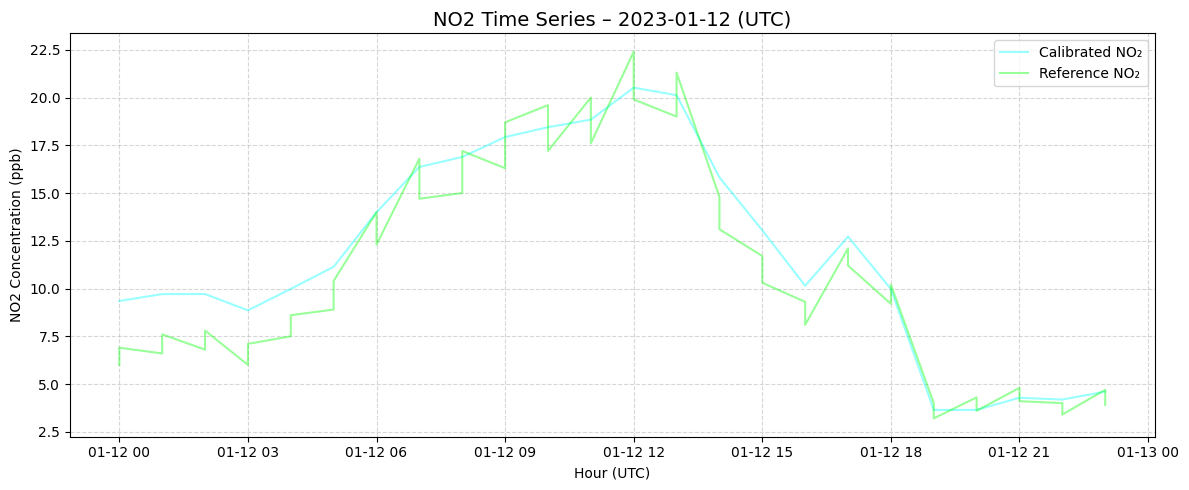

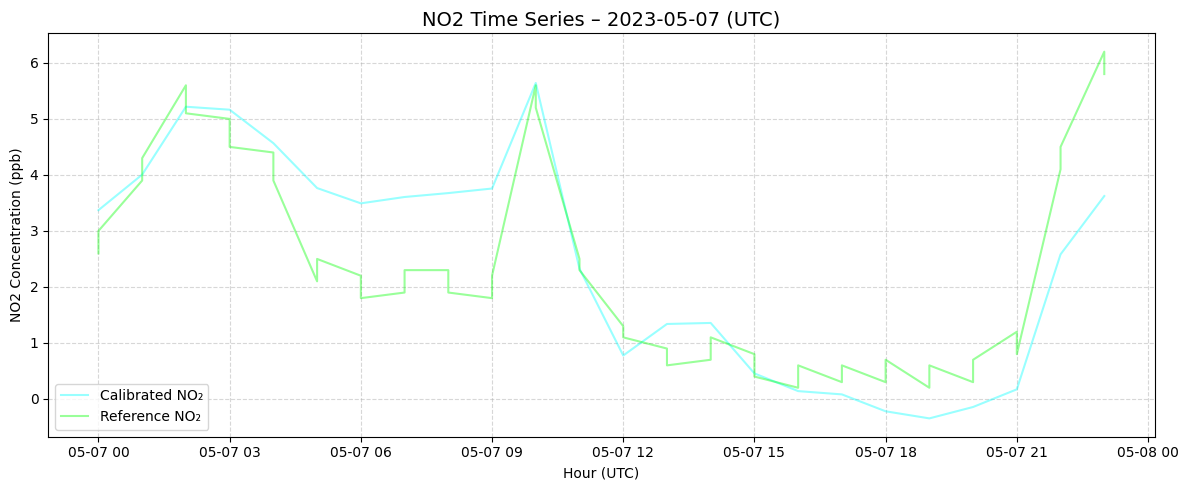

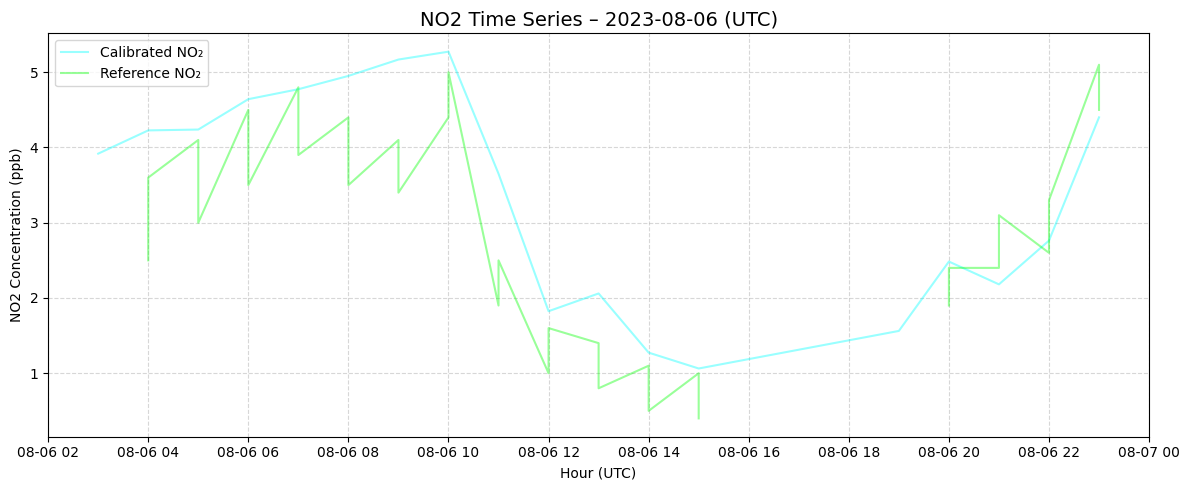

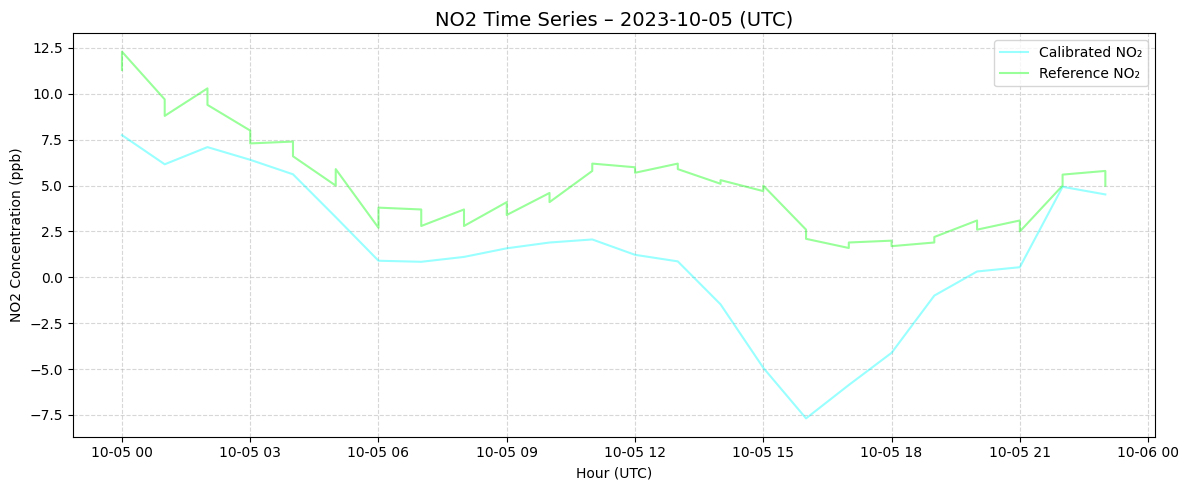

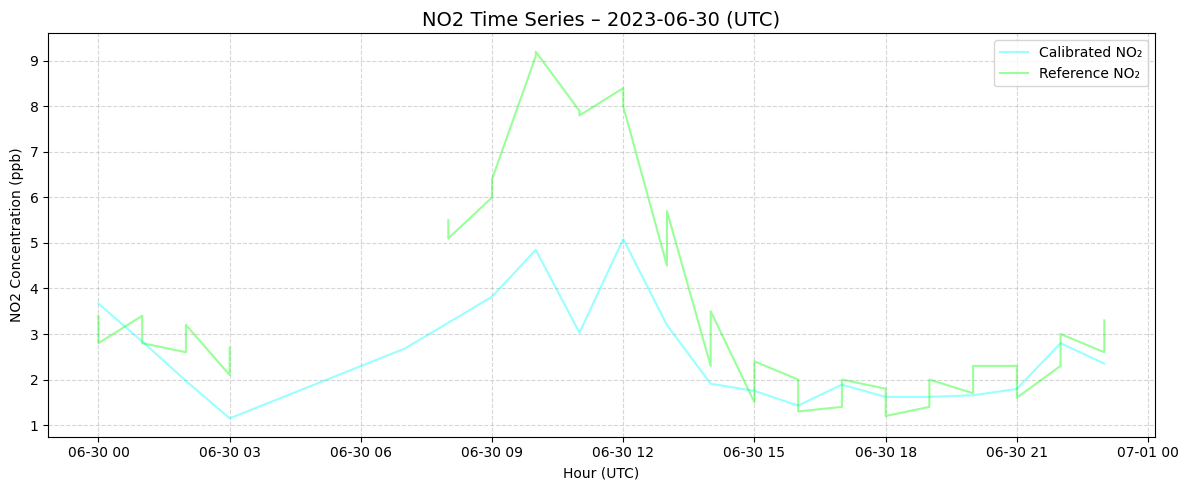

In [ ]:
plot_single_day(combined_df, "2023-01-12")
plot_single_day(combined_df, "2023-05-07")
plot_single_day(combined_df, "2023-08-06")
plot_single_day(combined_df, "2023-10-05")
plot_single_day(combined_df, "2023-06-30")

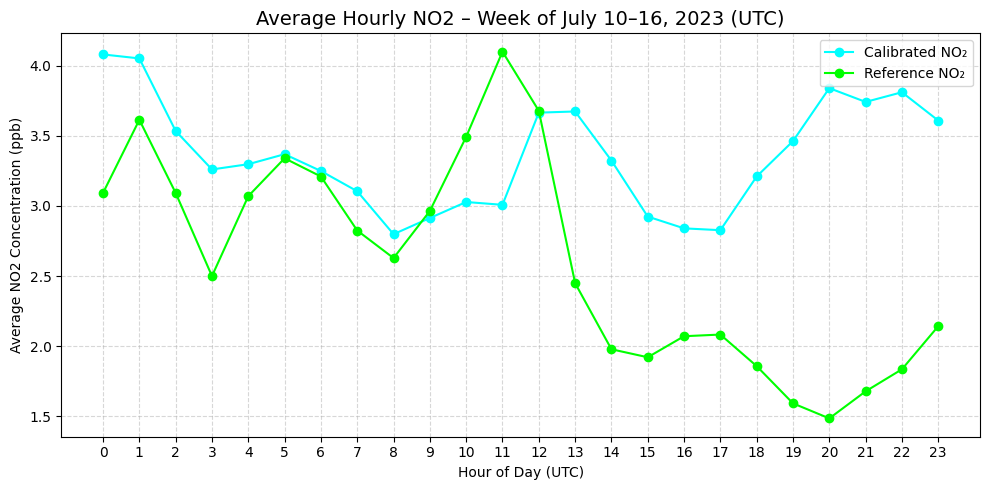

In [ ]:
start_date = pd.to_datetime("2023-07-10", utc=True)
end_date = pd.to_datetime("2023-07-17", utc=True)

week_df = combined_df[(combined_df["datetime_utc"] >= start_date) & 
                      (combined_df["datetime_utc"] < end_date)].copy()

week_df["hour"] = week_df["datetime_utc"].dt.hour

avg_by_hour = week_df.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_by_hour.index, avg_by_hour["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_by_hour.index, avg_by_hour["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Week of July 10–16, 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


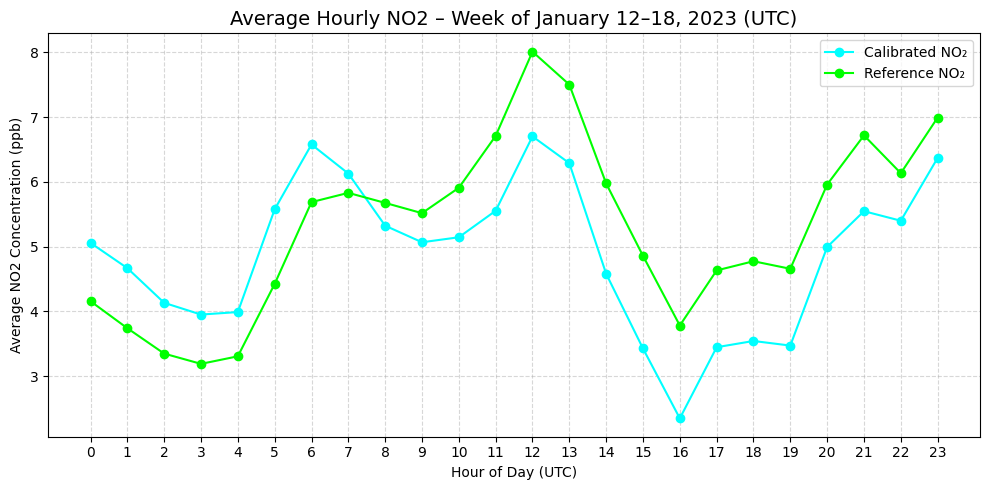

In [ ]:
start_date = pd.to_datetime("2023-01-12", utc=True)
end_date = pd.to_datetime("2023-01-18", utc=True)

week_df = combined_df[(combined_df["datetime_utc"] >= start_date) & 
                      (combined_df["datetime_utc"] < end_date)].copy()

week_df["hour"] = week_df["datetime_utc"].dt.hour

avg_by_hour = week_df.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_by_hour.index, avg_by_hour["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_by_hour.index, avg_by_hour["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Week of January 12–18, 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


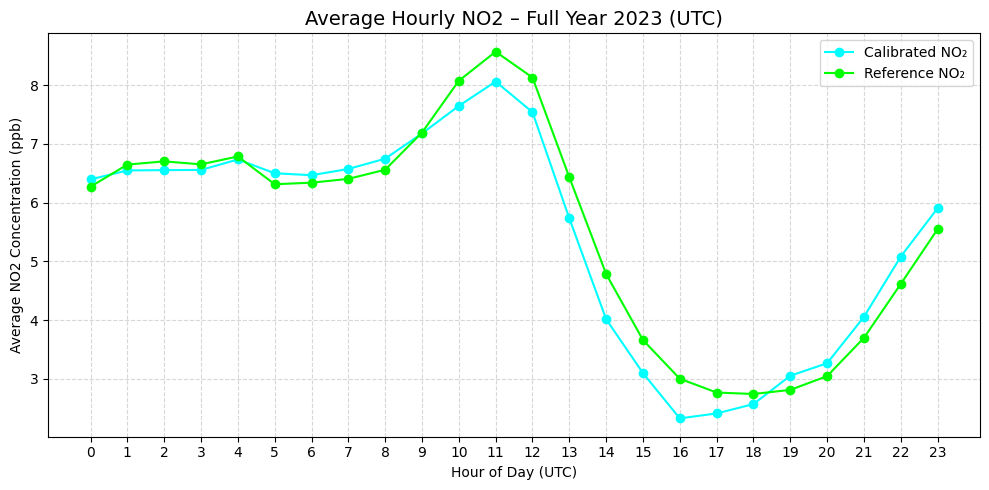

In [ ]:
df_2023 = combined_df[
    (combined_df["datetime_utc"] >= "2023-01-01") &
    (combined_df["datetime_utc"] < "2024-01-01")
].copy()

df_2023["hour"] = df_2023["datetime_utc"].dt.hour

avg_hourly = df_2023.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_hourly.index, avg_hourly["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_hourly.index, avg_hourly["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Full Year 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
